# Basic Postflight
Basic structure and skeleton for postflight scripts.

4/15/2020


In [1]:
import json #unneeded
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import pyplot
import pandas as pd
import numpy as np
import math


## Import Data
Basic import functions are defined here. 



In [70]:
def import_json(filename):
    """ Returns a python dataframe using json data from <filename> """
    data = pd.read_json(filename)
    print('JSON data for ', filename)
    print(data.head(5))
    return data


def import_csv(filename):
    """ Returns a python dataframe using csv data from <filename> """
    data = pd.read_csv(filename)
    data['Timestamp']=pd.to_datetime(data['Timestamp'])
    
    print('CSV data for ', filename)
    print(data.head(5))
    return data

In [71]:
print('You can use the .__doc__ function to get more information about a function. ' \
      'E.g. >import_json.__doc')
print(import_json.__doc__ )
print()
piper_table = import_json('n4023f_stamprun.json', )
print()
flightsim_table = import_csv("sample_flight_sim.csv")

#flightsim_table.head()

You can use the .__doc__ function to get more information about a function. E.g. >import_json.__doc
 Returns a python dataframe using json data from <filename> 

JSON data for  n4023f_stamprun.json
     Altitude  Course   Latitude  Longitude     Speed               Timestamp
0  136.811028     0.0  38.315401 -76.553887  0.000000 2020-02-15 17:23:39.164
1  136.811028   336.2  38.315401 -76.553887  3.599989 2020-02-15 17:23:39.168
2  136.811028   336.2  38.315401 -76.553887  3.599989 2020-02-15 17:23:39.366
3  136.811028   334.3  38.315401 -76.553887  3.599989 2020-02-15 17:23:39.369
4  136.811028   334.3  38.315404 -76.553887  3.599989 2020-02-15 17:23:39.562

CSV data for  sample_flight_sim.csv
   Time_Serial   Longitude   Latitude   Altitude      Roll     Pitch  \
0      56.1667 -157.943156  21.325247  23.924636 -0.050059 -0.231505   
1      57.1667 -157.943156  21.325247  23.924636 -0.050059 -0.231505   
2      58.1667 -157.943156  21.325247  23.924636 -0.050059 -0.231505   
3      59

## Initial Data Exploration
Look at the two plots below:
1. What is being plotted?
2. What does this show us?
3. Why is this useful?

To do
1. Create a function, flightsim_check, that conducts multiple checks on the data and reports this to the user (DRJ)
2. Create a function, piper_check, that conducts multiple checks on the data and reports this to the user (TMB)

For 1 and 2, explore multiple methods to present the data checks

3. Create functions, flightsim_pos_plot and flightsim_or_plot, that plot position (3 plots on 1 page), and orientation (3 plots on 1 page) for flightsim data (DRJ)
4. Create functions, piper_pos_plot and piper_or_plot, that plot position (3 plots on 1 page), orientation (course) for piper data (TMB)

In [128]:
#drj
def flightsim_check(flightsim_data):
    '''reports info about the quality of the data '''
    flightsim_data_mod = flightsim_data.copy()

    flightsim_data_mod['timeDelta']=flightsim_data_mod.Timestamp-flightsim_data_mod.Timestamp.shift(1)
    print(flightsim_data_mod.timeDelta.describe())
    print()
    # checks and reports data type but doesn't recognize them as float64 even though the dtypes command lists them as float64
    for i in range(len(flightsim_data_mod.axes[1])-1):
        if flightsim_data_mod.dtypes[i]=='float64':
            print('data type is', flightsim_data_mod.dtypes[i])
        elif flightsim_data_mod.dtypes[i]=='datetime64[ns]':
            print('data type is',flightsim_data_mod.dtypes[i])
        else:
            print('incorrect data type',flightsim_data_mod.dtypes[i])
    
    print(flightsim_data_mod.head(7))
    return flightsim_data_mod
    
    #check for and replace missing data with nan       
    #flightsim_data = flightsim_data.replace(0, np.NaN)
    

In [129]:
#drj
flightsim_check(flightsim_table)

count                513
mean     0 days 00:00:01
std      0 days 00:00:00
min      0 days 00:00:01
25%      0 days 00:00:01
50%      0 days 00:00:01
75%      0 days 00:00:01
max      0 days 00:00:01
Name: timeDelta, dtype: object

data type is float64
data type is float64
data type is float64
data type is float64
data type is float64
data type is float64
data type is float64
data type is datetime64[ns]
   Time_Serial   Longitude   Latitude   Altitude      Roll     Pitch  \
0      56.1667 -157.943156  21.325247  23.924636 -0.050059 -0.231505   
1      57.1667 -157.943156  21.325247  23.924636 -0.050059 -0.231505   
2      58.1667 -157.943156  21.325247  23.924636 -0.050059 -0.231505   
3      59.1667 -157.943156  21.325247  23.924636 -0.050058 -0.231505   
4      60.1667 -157.943156  21.325247  23.924636 -0.050058 -0.231504   
5      61.1667 -157.943156  21.325247  23.924636 -0.050058 -0.231504   
6      62.1833 -157.943156  21.325247  23.924636 -0.050058 -0.231504   

     Heading    

,Time_Serial,Longitude,Latitude,Altitude,Roll,Pitch,Heading,Timestamp,timeDelta
0,56.1667,-157.943156,21.325247,23.924636,-0.050059,-0.231505,89.869063,2020-04-22 12:00:56,NaT
1,57.1667,-157.943156,21.325247,23.924636,-0.050059,-0.231505,89.869063,2020-04-22 12:00:57,00:00:01
2,58.1667,-157.943156,21.325247,23.924636,-0.050059,-0.231505,89.869063,2020-04-22 12:00:58,00:00:01
3,59.1667,-157.943156,21.325247,23.924636,-0.050058,-0.231505,89.869063,2020-04-22 12:00:59,00:00:01
4,60.1667,-157.943156,21.325247,23.924636,-0.050058,-0.231504,89.869063,2020-04-22 12:01:00,00:00:01
5,61.1667,-157.943156,21.325247,23.924636,-0.050058,-0.231504,89.869063,2020-04-22 12:01:01,00:00:01
6,62.1833,-157.943156,21.325247,23.924636,-0.050058,-0.231504,89.869063,2020-04-22 12:01:02,00:00:01
7,63.1917,-157.943156,21.325247,23.924636,-0.050058,-0.231504,89.869063,2020-04-22 12:01:03,00:00:01
8,64.1583,-157.943156,21.325247,23.924636,-0.050058,-0.231504,89.869063,2020-04-22 12:01:04,00:00:01
9,65.1583,-157.943156,21.325247,23.924636,-0.050058,-0.231504,89.869063,2020-04-22 12:01:05,00:00:01


In [68]:
#drj
def flightsim_pos_plot(flightsim_data):
    '''plots position for altitude, longitude and latitude for flight simulation csv data'''
    plt.figure(figsize=(8,6))
    plt.title('Lat Lon and Alt time aligned')
    plt.subplot(311)
    plt.plot(flightsim_data.Time_Serial,flightsim_data.Altitude)
    plt.ylabel('Altitude')
    plt.subplot(312)
    plt.plot(flightsim_data.Time_Serial,flightsim_data.Longitude)
    plt.ylabel('Longitude')
    plt.subplot(313)
    plt.plot(flightsim_data.Timestamp,flightsim_data.Altitude)
    plt.ylabel('Latitude')
    plt.show()

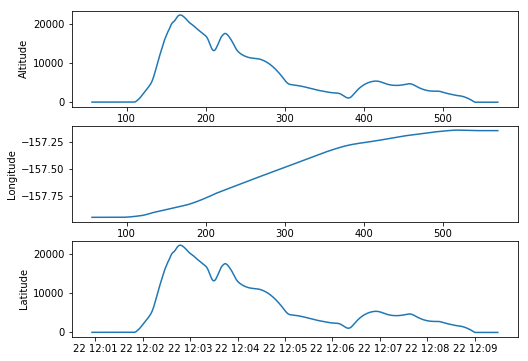

In [69]:
#drj
flightsim_pos_plot(flightsim_table)

In [82]:
#drj
def flightsim_ori_plot(flightsim_data):
    '''plots orientation for heading, roll and pitch for flight simulation csv data'''
    plt.figure(figsize=(8,6))
    plt.title('Heading Roll and Pitch time aligned')
    plt.subplot(311)
    plt.plot(flightsim_data.Time_Serial,flightsim_data.Heading)
    plt.ylabel('Heading')
    plt.subplot(312)
    plt.plot(flightsim_data.Time_Serial,flightsim_data.Roll)
    plt.ylabel('Roll')
    plt.subplot(313)
    plt.plot(flightsim_data.Timestamp,flightsim_data.Pitch)
    plt.ylabel('Pitch')
    plt.show()

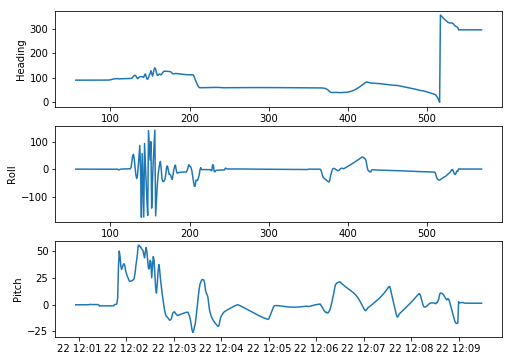

In [83]:
#drj
flightsim_ori_plot(flightsim_table)

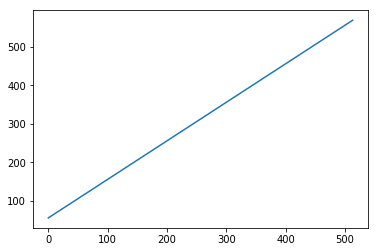

In [4]:
#drj
#pd.plotting.deregister_matplotlib_converters()
plt.plot(flightsim_table.Time)


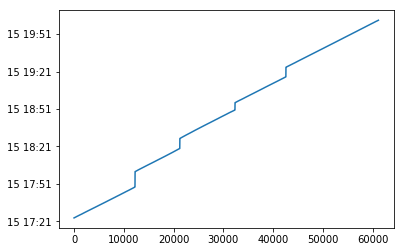

In [5]:
#drj
#pd.plotting.register_matplotlib_converters() # needed for matplotlib-pandas bug
plt.plot(piper_table.Timestamp)

## Process Data

For consistent (i.e. format doesn't change) files you read in, it may be useful to create functions to process the files, add derived parameters, and do other standard transformations. In this case, we'll separate the read functions from the processing functions.

Questions/Checks:
1. What is the purpose of this function definition?
2. What happens if we don't use .copy()?
3. Why would we want this behavior?
4. Read through the code and comment on anything notable

To do:
1. Add similar calculations for velocity, other derivatives. Add documentation and docstring (TMB)
2. Create a process_piper_data function that calculates derived parameters. Add documentation and docstring (DRJ)


In [12]:
#drj
def process_flightsim_data(flightsim_data):
    flightsim_modded = flightsim_data.copy()
    flightsim_modded['VerticalSpeed'] = flightsim_data.Altitude - flightsim_data.Altitude.shift(1)
    #print(flightsim_table.head(20))
    return flightsim_modded

flightsim_mod = process_flightsim_data(flightsim_table)
flightsim_mod.head(20)
#flightsim_table.head(10)

,Time,Longitude,Latitude,Altitude,Roll,Pitch,Heading,VerticalSpeed
0,56.1667,-157.943156,21.325247,23.924636,-0.050059,-0.231505,89.869063,NaN
1,57.1667,-157.943156,21.325247,23.924636,-0.050059,-0.231505,89.869063,3.000000e-08
2,58.1667,-157.943156,21.325247,23.924636,-0.050059,-0.231505,89.869063,0.000000e+00
3,59.1667,-157.943156,21.325247,23.924636,-0.050058,-0.231505,89.869063,0.000000e+00
4,60.1667,-157.943156,21.325247,23.924636,-0.050058,-0.231504,89.869063,0.000000e+00
5,61.1667,-157.943156,21.325247,23.924636,-0.050058,-0.231504,89.869063,-1.000000e-08
6,62.1833,-157.943156,21.325247,23.924636,-0.050058,-0.231504,89.869063,0.000000e+00
7,63.1917,-157.943156,21.325247,23.924636,-0.050058,-0.231504,89.869063,0.000000e+00
8,64.1583,-157.943156,21.325247,23.924636,-0.050058,-0.231504,89.869063,0.000000e+00
9,65.1583,-157.943156,21.325247,23.924636,-0.050058,-0.231504,89.869063,0.000000e+00


In [172]:
#drj
def process_piper_data(piper_data):
    ''' work in progress function: derives parameters from piper flight data'''
    piper_data_mod = piper_data.copy()
    for i in range(len(piper_data)-1):
        timeDiff = pd.to_timedelta(piper_data_mod.Timestamp[i+1]-piper_data_mod.Timestamp[i]).total_seconds()
    piper_data_mod['TimeDelta']= timeDiff
    
    altitudeDiff = piper_data_mod.Altitude-piper_data_mod.Altitude.shift(1)  
    vertSpeedDiff = altitudeDiff-altitudeDiff.shift(1)
    latitudeDiff = piper_data_mod.Latitude-piper_data_mod.Latitude.shift(1)
    latSpeedDiff = latitudeDiff-latitudeDiff.shift(1)
    longitudeDiff = piper_data_mod.Longitude-piper_data_mod.Longitude.shift(1)
    longSpeedDiff = longitudeDiff-longitudeDiff.shift(1)
    

    piper_data_mod['VerticalSpeed'] = altitudeDiff/piper_data_mod.TimeDelta
    piper_data_mod['VerticalAcceleration'] = vertSpeedDiff/piper_data_mod.TimeDelta
    piper_data_mod['LateralSpeed'] = latitudeDiff/piper_data_mod.TimeDelta
    piper_data_mod['LateralAcceleration'] = latSpeedDiff/piper_data_mod.TimeDelta
    piper_data_mod['LongitudalSpeed'] = longitudeDiff/piper_data_mod.TimeDelta
    piper_data_mod['LongitudalAcceleration'] = longSpeedDiff/piper_data_mod.TimeDelta
#     piper_data_mod['MagnitudeVelocity3D'] = math.sqrt((piper_data_mod.VerticalSpeed**2)+\
#                                                  (piper_data_mod.LateralSpeed**2)+\
#                                                  (piper_data_mod.LongitudalSpeed**2))
    
    print(piper_data_mod.head(10))
    return(piper_data_mod)
    timeSpan = piper_data_mod.Timestamp[61141]-piper_data_mod.Timestamp[1]
    frequency = timeSpan/61141
    
    print()
    print('FLight Duration:',timeSpan)
    print('Average Frequency:',frequency)

In [173]:
#drj
process_piper_data(piper_table)

     Altitude  Course   Latitude  Longitude     Speed               Timestamp  \
0  136.811028     0.0  38.315401 -76.553887  0.000000 2020-02-15 17:23:39.164   
1  136.811028   336.2  38.315401 -76.553887  3.599989 2020-02-15 17:23:39.168   
2  136.811028   336.2  38.315401 -76.553887  3.599989 2020-02-15 17:23:39.366   
3  136.811028   334.3  38.315401 -76.553887  3.599989 2020-02-15 17:23:39.369   
4  136.811028   334.3  38.315404 -76.553887  3.599989 2020-02-15 17:23:39.562   
5  136.811028   332.3  38.315404 -76.553887  3.699988 2020-02-15 17:23:39.567   
6  137.139112   332.3  38.315408 -76.553894  3.699988 2020-02-15 17:23:39.966   
7  137.139112   330.0  38.315408 -76.553894  3.699988 2020-02-15 17:23:39.968   
8  137.139112   330.0  38.315411 -76.553894  3.699988 2020-02-15 17:23:39.971   
9  137.139112   327.8  38.315411 -76.553894  3.699988 2020-02-15 17:23:39.972   

   TimeDelta  VerticalSpeed  VerticalAcceleration  LateralSpeed  \
0      0.008            NaN              

,Altitude,Course,Latitude,Longitude,Speed,Timestamp,TimeDelta,VerticalSpeed,VerticalAcceleration,LateralSpeed,LateralAcceleration,LongitudalSpeed,LongitudalAcceleration
0,136.811028,0.0,38.315401,-76.553887,0.000000,2020-02-15 17:23:39.164,0.008,NaN,NaN,NaN,NaN,NaN,NaN
1,136.811028,336.2,38.315401,-76.553887,3.599989,2020-02-15 17:23:39.168,0.008,0.0000,NaN,0.000000,NaN,0.000000,NaN
2,136.811028,336.2,38.315401,-76.553887,3.599989,2020-02-15 17:23:39.366,0.008,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000
3,136.811028,334.3,38.315401,-76.553887,3.599989,2020-02-15 17:23:39.369,0.008,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000
4,136.811028,334.3,38.315404,-76.553887,3.599989,2020-02-15 17:23:39.562,0.008,0.0000,0.0000,0.000427,0.000427,0.000000,0.000000
5,136.811028,332.3,38.315404,-76.553887,3.699988,2020-02-15 17:23:39.567,0.008,0.0000,0.0000,0.000000,-0.000427,0.000000,0.000000
6,137.139112,332.3,38.315408,-76.553894,3.699988,2020-02-15 17:23:39.966,0.008,41.0105,41.0105,0.000427,0.000427,-0.000854,-0.000854
7,137.139112,330.0,38.315408,-76.553894,3.699988,2020-02-15 17:23:39.968,0.008,0.0000,-41.0105,0.000000,-0.000427,0.000000,0.000854
8,137.139112,330.0,38.315411,-76.553894,3.699988,2020-02-15 17:23:39.971,0.008,0.0000,0.0000,0.000425,0.000425,0.000000,0.000000
9,137.139112,327.8,38.315411,-76.553894,3.699988,2020-02-15 17:23:39.972,0.008,0.0000,0.0000,0.000000,-0.000425,0.000000,0.000000


End of usable code

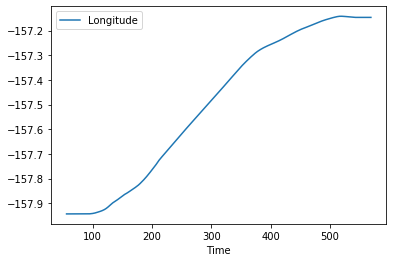

In [151]:
#csv_df = pd.DataFrame(flightsim_table, columns=['Time', 'Longitude', 'Latitude'])
flightsim_table.set_index('Time')
flightsim_table.head(5)
flightsim_table.plot('Time', 'Longitude')


                             Timestamp     Speed
0     2020-02-15 17:23:39.164000+00:00  0.000000
1     2020-02-15 17:23:39.168000+00:00  3.599989
2     2020-02-15 17:23:39.366000+00:00  3.599989
3     2020-02-15 17:23:39.369000+00:00  3.599989
4     2020-02-15 17:23:39.562000+00:00  3.599989
...                                ...       ...
61137 2020-02-15 20:02:08.452000+00:00  0.000000
61138 2020-02-15 20:02:08.656000+00:00  0.000000
61139 2020-02-15 20:02:08.661000+00:00  0.000000
61140 2020-02-15 20:02:08.915000+00:00  0.000000
61141 2020-02-15 20:02:08.923000+00:00  0.000000

[61142 rows x 2 columns]
Latitude                 float64
Course                   float64
Longitude                float64
Altitude                 float64
Speed                    float64
Timestamp    datetime64[ns, UTC]
dtype: object


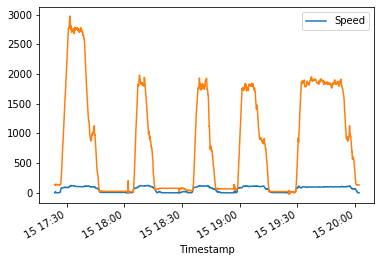

In [100]:
json_table['Timestamp']
df = pd.DataFrame(json_table, columns = ['Timestamp', 'Speed'])
df.set_index("Timestamp")
print(df)
print(json_table.dtypes)
df.plot('Timestamp','Speed')


pd.plotting.register_matplotlib_converters() # needed for matplotlib-pandas bug

plt.plot(json_table.Timestamp, json_table.Altitude)

[Text(0, 0.5, 'Speed'), Text(0.5, 0, 'Time'), Text(0.5, 1.0, 'test')]

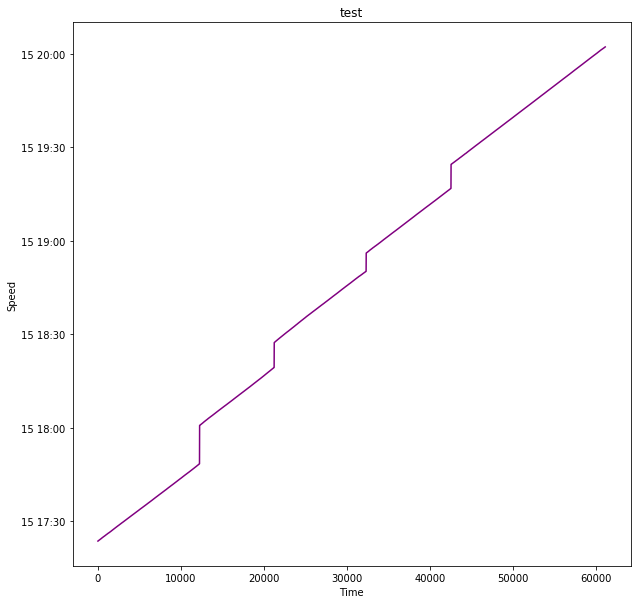

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
pd.plotting.deregister_matplotlib_converters()
ax.plot(df['Timestamp'],               
       color='purple')

ax.set(xlabel='Time',
      ylabel='Speed',
      title='test')

Latitude                 float64
Course                   float64
Longitude                float64
Altitude                 float64
Speed                    float64
Timestamp    datetime64[ns, UTC]
dtype: object

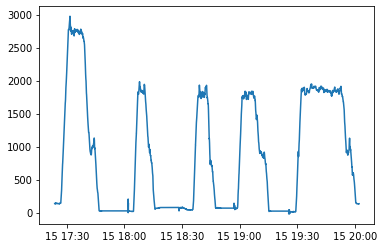